### 아이디어
- 다익스트라의 최단경로를 재구성 한 뒤, 그 경로를 제거하고 다시 다익스트라를 돌린다.
- 어떤 경로 집합의 최단경로가 2개이상일 수 있다.
  - 처음에 나온 최단 경로의 시간과 같은게 있으면, 그렇지 않을때까지 반복하면 될 것 같다. 약간 찝찝하긴 하지만.

### 반례
- 찜찜한게 뭔가 있는게 맞았다.
  - 정점을 완전히 지우면서 최단경로를 갱신하니까 다음 케이스와 같을 때 반례가 생겼다.

4 5
0 2
0 1 1
0 3 5
1 2 2
1 3 1
3 2 1
0 0

- 다익스트라로 구한 최단경로에서 1->2 구간을 먼저 지웠을 경우 1->3, 3->2로 이루어진 최단경로는 고려하지 못하게 된다.
  - 최단경로를 지울 때, 모든 경로를 한꺼번에 지우지 말고, 최단경로로 향하는 마지막 경로만 지운다면 어떨까?
  - 간선의 길이가 $10^4$이므로 최악의 케이스가 나온다고 한들 어느정도는 커버가 될 것이다.
  - 이 방법은 아닌 것 같다. 최단경로로 가는 길을 제대로 지우지 못한다.
  - 하지만 이 방법을 완전히 버려야할 것 같진 않다.
- 스택을 사용해서 최단경로를 하나씩 지우고, 다시 최단경로를 구해본다. 모든 스택이 다 비워지면 다시 최단경로를 구해본다.
  - 여전히 똑같으면, 최단경로 비용이 달라질 때 까지 반복
- 그리고 최단경로를 지우는 스택은 S까지만 지운다. -1이 나올때까지 지우면 정답이 틀려질 수 있다.

- 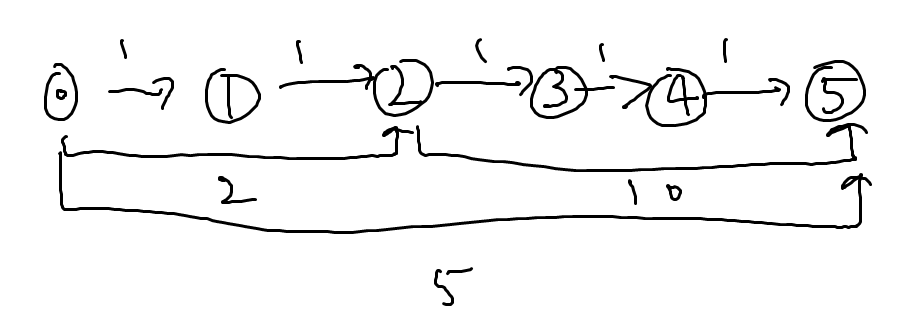

- 이 경우는 또 어떻게 처리해야 할까.. 완전히 내 방식의 저격이다
- 최단경로가 여러개 있을 때 모든 경로를 구할 수 있도록 다익스트라를 수정하면 될 것이라고 생각한다.
  - 그리고 이런 문제는 adjucency matrix로 풀어야 할 것 같다... 너무 코드가 복잡해져버렸다.
- 메모리 초과가 나는 반례 
  - 다익스트라를 돌릴때, heap에 다음 간선을 넣을땐, 최단경로가 갱신됐을 때 만이여야 한다.
  - 갱신해야할때가 아닌, 비용이 같은 간선을 추가하면 사이클이 존재할 때 무한루프에 빠지게 된다.

In [ ]:
import sys, io, os, collections
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline
from heapq import heappop, heappush
INF = 1234567891

def dij(G, s):
  n = len(G)
  D, P = [INF] * n, [set() for _ in range(n)]
  D[s] = 0

  Q = [(0, s)]
  while Q:
    uw, u = heappop(Q)
    if uw != D[u]: continue
    for v, vw in G[u]:
      if vw + uw < D[v]: 
        D[v] = vw + uw
        P[v] = set([u]) #최단거리가 갱신될때마다 부모 노드 번호도 갱신한다. 
        heappush(Q, (vw + uw, v))
      elif uw + vw == D[v] :
        P[v].add(u)

  return D, P

def sol() :
  N, M = map(int, input().split())
  if N == M == 0 : raise StopIteration
  S, D = map(int, input().split())
  G = [[] for _ in range(N)]
  for _ in range(M) :
    u, v, w = map(int, input().split())
    G[u].append((v, w))
  dist, P = dij(G, S)
  first = dist[D]
  if first == INF : #해당 경로로 가는 경로가 없으면 불가능
    sys.stdout.write('-1\n')
    return
  
  while True :
    vis = [False] * N
    vis[D] = True
    Q = collections.deque([D])
    while Q :
      v = Q.popleft()
      for u in P[v] : #u에서 도착점이 D인 것을 전부 지운다
        for i, (p, _) in enumerate(G[u]) :
          if p != v : continue
          if not vis[u] : 
            Q.append(u)
            vis[u] = True
          del G[u][i]
          break
  
    dist, P = dij(G, S)
    if dist[D] != first: break
  sys.stdout.write(str(-1 if dist[D] == INF else dist[D]) + '\n')
  
while True :
  try :
    sol()
  except StopIteration :
    break
  except :
    raise

7 9
0 6
0 1 1
0 2 1
0 3 2
0 4 3
1 5 2
2 6 4
3 6 2
4 6 4
5 6 1
4 6
0 2
0 1 1
1 2 1
1 3 1
3 2 1
2 0 3
3 0 2
6 8
0 1
0 1 1
0 2 2
0 3 3
2 5 3
3 4 2
4 1 1
5 1 1
3 0 1
0 0
;; 30
6 9
0 5
0 1 1
1 2 1
2 5 1
0 3 1
3 4 1
4 5 1
0 2 10
2 3 10
3 5 10
0 0
;; -1
4 5
0 2
0 1 1
0 3 5
1 2 2
1 3 1
3 2 1
0 0
;; -1 
8 11
0 7
0 1 1
0 2 1
1 3 1
2 3 3
3 4 1
4 7 1
4 6 2
3 5 1
5 6 2
5 7 1
6 7 1
0 0
;; -1
6 8
0 5
0 1 1
1 2 1
2 3 1
3 4 1
4 5 1
0 2 2
2 5 10
0 5 5
0 0

- 역간선을 구축해서 좀더 우아하게 푸는 풀이가 있다고 한다. 나중에 생각나면 다시 풀어보도록 하자.
  - 인접행렬용 템플릿이나 만들어야겟다